# Pareto front computation

Define Pareto front of a point ensemble to optimize two antagonistic properties.

Here we plot Pareto front for optimizing hardness and ductility of the quinary Nb-Ti-Zr-Cr-Mo, in amorphous domain and in crystalline domain.

## Import libraries, path for datasets

In [1]:
import ParetoFront as pf
import os
import pandas as pd
datasets_dir=os.getenv("DATASETS_DIR")

## Import databases

In [6]:
databaseRF=pd.read_csv(f'{datasets_dir}/BINAIRES/prediction_RF_with3binaries_mechanical_model.csv')
databaseNN=pd.read_csv(f'{datasets_dir}/BINAIRES/prediction_NN_with3binaries_mechanical_model.csv')
databaseNN_class=pd.read_csv(f'{datasets_dir}/BINAIRES/prediction_NN_class_with3binaries.csv')
display(databaseNN)

index     Zr   Nb   Mo   Ti     Cr  \
0            compo_0    0.0  0.0  0.0  0.0  100.0   
1            compo_1    0.0  0.0  0.0  2.0   98.0   
2            compo_2    0.0  0.0  0.0  4.0   96.0   
3            compo_3    0.0  0.0  0.0  6.0   94.0   
4            compo_4    0.0  0.0  0.0  8.0   92.0   
...              ...    ...  ...  ...  ...    ...   
316246  compo_316246   98.0  0.0  0.0  0.0    2.0   
316247  compo_316247   98.0  0.0  0.0  2.0    0.0   
316248  compo_316248   98.0  0.0  2.0  0.0    0.0   
316249  compo_316249   98.0  2.0  0.0  0.0    0.0   
316250  compo_316250  100.0  0.0  0.0  0.0    0.0   

        NN - Young Modulus prediction (GPa)  NN - Hardness prediction (GPa)  \
0                                 269.70508                       12.797421   
1                                 263.96204                       12.626379   
2                                 258.21900                       12.472447   
3                                 252.47864                       12.317714   
4                                 246.74070                       12.175239   
...                                     ...                             ...   
316246                            151.44666                       10.250916   
316247                            154.23297                       10.355969   
316248                            152.95987                       10.191875   
316249                            154.16434                       10.226043   
316250                            155.47887                       10.391868   

               C         x    deltaH         E2/H  
0       1.451368  1.431345  0.689439  5684.022599  
1       1.445080  1.426725  0.688066  5518.285057  
2       1.437184  1.420976  0.686295  5345.947909  
3       1.429057  1.415084  0.684462  5175.105028  
4       1.419634  1.408302  0.682304  5000.392439  
...          ...       ...       ...          ...  
316246  1.151029  1.228367  0.614634  2237.467444  
316247  1.157290  1.232339  0.616297  2297.014315  
316248  1.164908  1.237036  0.618484  2295.624881  
316249  1.168578  1.239364  0.619467  2324.129062  
316250  1.161017  1.234696  0.617300  2326.211131  

[316251 rows x 12 columns]

## Pareto front in amorphous domain

### Filters amorphous compositions from NN predictions and define Pareto optimal compositions

A composition is amorphous if the predicted XRD phase class and the predicted EBSD phase class are both 0.
Properties are predicted by RF, thus we filter corresponding lines of RF prediction dataframe.

In [12]:
amorphous_compo=databaseRF[databaseNN_class['NN - Phase prediction from XRD class']==0]
display(amorphous_compo)
[pareto_front_amorphous,colors]=pf.pareto_frontier(amorphous_compo,'NN - Hardness prediction (GPa)','deltaH',0.015)

index    Zr   Nb   Mo    Ti    Cr  \
16          compo_16   0.0  0.0  0.0  32.0  68.0   
17          compo_17   0.0  0.0  0.0  34.0  66.0   
18          compo_18   0.0  0.0  0.0  36.0  64.0   
19          compo_19   0.0  0.0  0.0  38.0  62.0   
20          compo_20   0.0  0.0  0.0  40.0  60.0   
...              ...   ...  ...  ...   ...   ...   
307432  compo_307432  62.0  0.0  2.0  32.0   4.0   
307620  compo_307620  62.0  2.0  0.0  28.0   8.0   
307621  compo_307621  62.0  2.0  0.0  30.0   6.0   
307622  compo_307622  62.0  2.0  0.0  32.0   4.0   
307623  compo_307623  62.0  2.0  0.0  34.0   2.0   

        NN - Young Modulus prediction (GPa)  NN - Hardness prediction (GPa)  \
16                               205.193360                       12.209983   
17                               203.018807                       11.918257   
18                               191.370072                       11.840990   
19                               188.468893                       11.792928   
20                               188.258198                       11.756457   
...                                     ...                             ...   
307432                           115.556688                        7.808882   
307620                           115.473199                        7.908024   
307621                           115.473199                        7.849370   
307622                           115.556688                        7.808882   
307623                           116.500332                        7.306938   

               C         x    deltaH         E2/H  
16      1.251471  1.293638  0.640333  3448.351605  
17      1.265250  1.302540  0.644089  3458.277238  
18      1.219287  1.272527  0.632119  3092.858324  
19      1.209748  1.266363  0.629617  3012.019136  
20      1.211705  1.267602  0.630161  3014.611306  
...          ...       ...       ...          ...  
307432  1.167283  1.237276  0.620503  1710.020363  
307620  1.155255  1.229778  0.617136  1686.143005  
307621  1.161983  1.233965  0.619024  1698.742688  
307622  1.167283  1.237276  0.620503  1710.020363  
307623  1.234980  1.280293  0.638992  1857.457577  

[106651 rows x 12 columns]

### Plot Pareto frontier of amorphous compositions

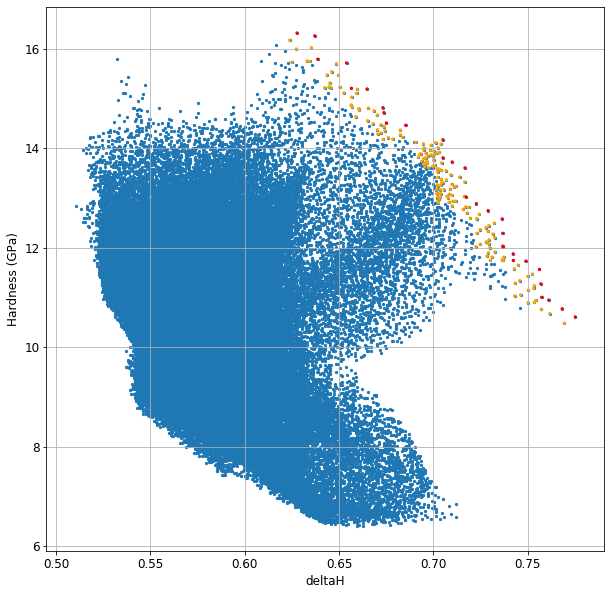

In [8]:
pf.plot_pareto(amorphous_compo,pareto_front_amorphous, 'NN - Hardness prediction (GPa)','deltaH',"deltaH","Hardness (GPa)",colors,'./pareto_amorph_RF_add3binaries')

## Pareto frontier of crystaline composition

### Filters crystalline compositions from NN predictions and define Pareto optimal compositions

A composition is crystalline if the predicted XRD phase class or the predicted EBSD phase class is 1.
Properties are predicted by RF, thus we filter corresponding lines of RF prediction dataframe.

In [9]:
cryst_compo=databaseRF[(databaseNN_class['NN - Phase prediction from XRD class']==1)]
[pareto_front_cryst,colors]=pf.pareto_frontier(cryst_compo,'NN - Hardness prediction (GPa)','deltaH',0.015)


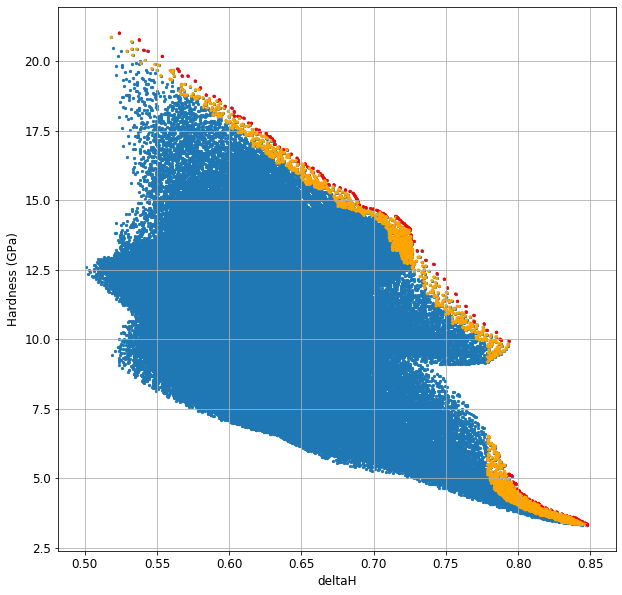

In [10]:
pf.plot_pareto(cryst_compo,pareto_front_cryst, 'NN - Hardness prediction (GPa)','deltaH',"deltaH","Hardness (GPa)",colors,'./pareto_cryst_NN_add3binaries')


In [11]:
pareto_front_cryst.to_csv('./Pareto_opt_cryst_RF_add3binairies.csv')
pareto_front_amorphous.to_csv('./Pareto_opt_amorph_RF_add3binaries.csv')